<h1 style="text-align:center;">Analysis of Taxi Travel Behavior in Chicago: Popular Destinations,
Prominent Companies, and the Impact of Weather Conditions</h1>

### Introduction

The following project aims to analyze taxi travel behavior in the city of Chicago based on three main aspects:

- Neighborhoods
- Taxi companies
- The relationship between trip duration and weather conditions

The objectives of this project are:

- Identify the most popular neighborhoods based on the number of destination trips
- Recognize the most used taxi companies by users based on the number of trips
- Relate weather conditions to trip duration, focusing on Saturdays in November on a specific route from the Loop to O'Hare Airport

In summary, there is a significant concentration of destination trips in 4 specific neighborhoods of the city. Additionally, the company Flash Cab can be considered the most popular, and it is confirmed that weather conditions do affect trip duration.

### Loading datasets and importing libraries

In [22]:
# Import the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math as mt
import seaborn as sb
from scipy.stats import ttest_ind
from scipy.stats import levene

In [23]:
# Load the databases
company_info = pd.read_csv('C:/Users/Natalia Lopera/Documents/Python_projects/Taxi_Travels_Chicago_1/Taxi_travles_Chicago/moved_project_sql_result_01 (1).csv')
trips = pd.read_csv('C:/Users/Natalia Lopera/Documents/Python_projects/Taxi_Travels_Chicago_1/Taxi_travles_Chicago/moved_project_sql_result_04.csv')
df = pd.read_csv('C:/Users/Natalia Lopera/Documents/Python_projects/Taxi_Travels_Chicago_1/Taxi_travles_Chicago/moved_project_sql_result_07.csv')

In [24]:
#Print the company_info dataframe
company_info

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [25]:
#Print the trips dataframe
trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [26]:
# Print the df dataframe
df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### Data Exploration

In [27]:
# Check the information of the data in the company_info dataframe
company_info.info()
print()
print(f'The company_info dataframe has {company_info.duplicated().sum()} duplicate values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

The company_info dataframe has 0 duplicate values


In [28]:
# Check the information of the data in the trips dataframe
trips.info(memory_usage= 'deep')
print()
print(f'The trips dataframe has {trips.duplicated().sum()} duplicate values')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 7.1 KB

The trips dataframe has 0 duplicate values


In [29]:
# Check the information of the data in the df dataframe
df.info()
print()
print(f'The df dataframe has {df.duplicated().sum()} duplicate values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

The df dataframe has 197 duplicate values


General Comments:

* None of the three dataframes contain null values.
* The data types used in all cases are appropriate.
* Standardization of letters in the company_name column of the company_info dataframe and the dropoff_location_name column of the trips dataframe has been applied, along with the removal of special characters like "." or "-".
* It's worth noting that the company_info dataframe provides the number of trips made between November 15 and 16, while the trips dataframe presents the average number of trips ending at each location for the entire month of November.
* While the company_info and trips dataframes have no duplicate values, the df dataframe does contain duplicates. This is expected due to the nature of the data, where multiple trips can occur at the same date and time, even under identical weather conditions.

In [30]:
# Convert the letters in the company_name column to lowercase
company_info['company_name'] = company_info['company_name'].str.lower()

# Replace special characters with spaces
company_info['company_name'] = company_info['company_name'].str.replace('.', '', regex=False).str.replace('-', ' ', regex=False)


In [31]:
# Convert the letters in the dropoff_location_name column to lowercase

trips['dropoff_location_name'] = trips['dropoff_location_name'].str.lower()

### Comportamiento general de los datos

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


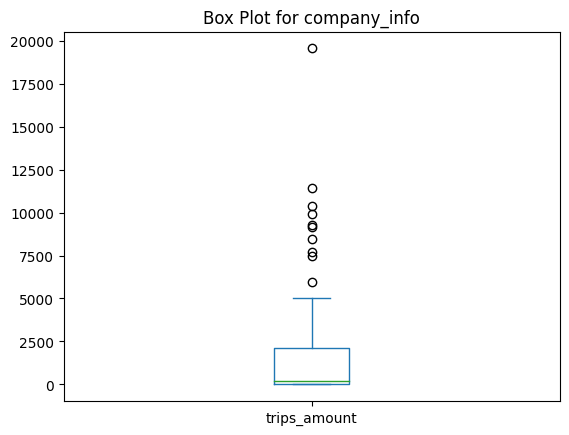

In [32]:
#Graph Box Plot for company_info
print(company_info.describe())
company_info['trips_amount'].plot(kind='box', title= 'Box Plot for company_info');

Comments:

The distribution of trip quantity data is not entirely symmetric. Specifically, 25% of the companies had between 2 and 20 trips, while 50% had between 20 and 178 trips. Moreover, the majority of cases (75% of the companies) fell within the range of 178 to 2106 trips. However, there are some outliers with trip counts ranging from 2106 to 19558. This suggests that there is a small group of specific companies that account for a disproportionately large number of trips compared to the rest of the dataset.

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


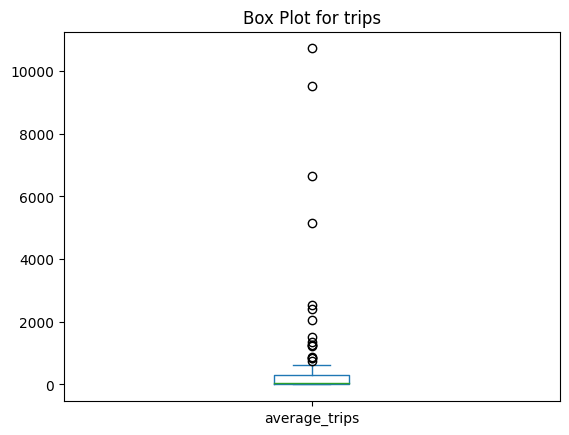

In [33]:
#Graph Box Plot for trips
print(trips.describe())
trips['average_trips'].plot(kind='box', title= 'Box Plot for trips');


Comments:

In this case, there is also scattered data, with several extreme values. This indicates that the percentage of trips ending in a small set of specific neighborhoods is quite high compared to the rest of the dataset. This suggests that there may be a few neighborhoods that are quite popular, at least for trip endings, compared to others. These neighborhoods could have attractions that draw people, leading to a concentration of trip endings there. Conversely, trips to other neighborhoods may be more dispersed, possibly reflecting return trips to various residential areas. Tourist destinations or attractions in a city are typically concentrated in specific locations, while people's residences may be scattered.

This information could be contrasted with the neighborhoods where trips originate. If the hypothesis is correct, the most popular neighborhoods for trip endings may also be popular starting points for trips. Assuming people make round trips, starting from their residential neighborhood to a popular destination neighborhood, this explains why trip endings are concentrated in these neighborhoods. Eventually, people would likely take a return trip back to their residences, at which point the destination neighborhood becomes the starting point for the trip.

This flow provides a clearer and more natural progression of ideas while maintaining the original meaning.

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


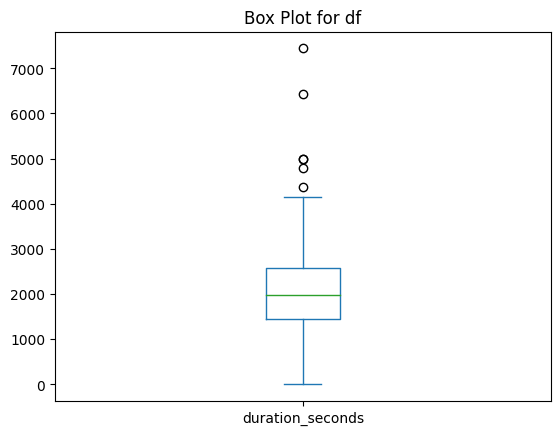

In [34]:
# Graph of Box Plot for df
print(df.describe())
df['duration_seconds'].plot(kind='box', title= 'Box Plot for df');

Comments:

This diagram was applied to the duration_seconds column, which stores the duration of trips in seconds from the Loop to O'Hare Airport. The minimum value is 0 seconds, which is somewhat unusual, although these could be trips requested and canceled immediately. Excluding that detail, 25% of the data falls between 0 and 1438 seconds, 50% between 1438 and 1980 seconds, and 75% between 1980 and 2580 seconds. The maximum value is 7440 seconds. Here, there is a somewhat more uniform dispersion of data compared to the previous dataframes. This can be explained by the delimited zone from the Loop to the Airport. Despite variations due to various factors such as the size of the Loop area or trip particulars, the data dispersion is not as pronounced as in the case of trips or company_info due to the defined boundaries.

### Graph of the Top 10 Most Popular Neighborhoods by Number of Destination Trips

In [35]:
# Top 10 Neighborhoods Based on Trip Endings

popular_neighborhoods = trips.sort_values(by= 'average_trips', ascending =False).head(10)
popular_neighborhoods = popular_neighborhoods.rename(columns ={'average_trips' : 'average trips', 'dropoff_location_name': 'neighborhoods'})
popular_neighborhoods


,neighborhoods,average trips
0,loop,10727.466667
1,river north,9523.666667
2,streeterville,6664.666667
3,west loop,5163.666667
4,o'hare,2546.900000
5,lake view,2420.966667
6,grant park,2068.533333
7,museum campus,1510.000000
8,gold coast,1364.233333
9,sheffield & depaul,1259.766667


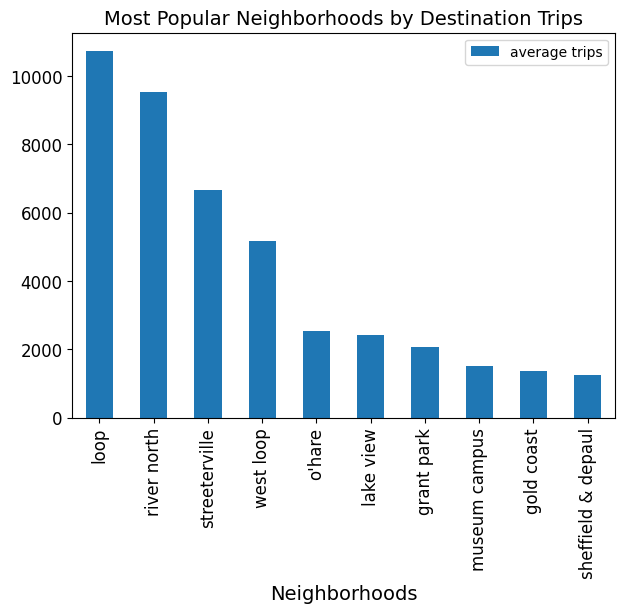

In [36]:
# Graph of the Top 10 Most Popular Neighborhoods

popular_neigh_graphic = popular_neighborhoods.plot(kind='bar', 
                                                   x='neighborhoods', 
                                                   y= 'average trips', 
                                                   figsize = (7, 5), fontsize = 12)

popular_neigh_graphic.set_xlabel('Neighborhoods', fontsize=14)
popular_neigh_graphic.set_title('Most Popular Neighborhoods by Destination Trips', fontsize=14);


Comments:

As observed in the graph, Loop and River North are the neighborhoods with the highest concentration of destination trips, suggesting that they are quite popular areas in the city. However, Streeterville and West Loop, while having a considerably lower number of destination trips compared to the other 6 neighborhoods, are also noteworthy. It could be said that there is a significant concentration among these 4 mentioned neighborhoods compared to the others.

### Graph of the Top 10 Most Popular Taxi Companies by Number of Trips

In [37]:
# Most popular taxi companies

popular_companies = company_info.sort_values(by= 'trips_amount', ascending =False).head(10)
popular_companies = popular_companies.rename(columns = {'company_name': 'company name', 'trips_amount': 'number of trips'})

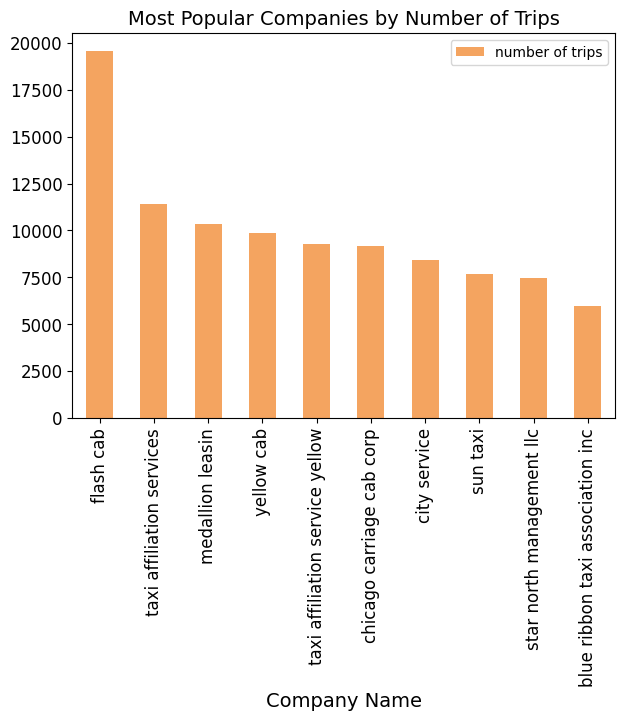

In [38]:
# Graph of the most popular companies according to the number of trips

popular_companies_graphic = popular_companies.plot(kind='bar', 
                                                   x='company name', 
                                                   y= 'number of trips', 
                                                   figsize = (7, 5), fontsize = 12,
                                                   color = 'sandybrown')

popular_companies_graphic.set_xlabel('Company Name', fontsize=14)
popular_companies_graphic.set_title('Most Popular Companies by Number of Trips', fontsize=14);

Comments:

As the graph shows, the company Flash Cab is considerably more popular than the other 9 companies. While there is a downward trend among the remaining companies, it is uniform and there are no drastic differences between them. This suggests that Flash Cab has a significant concentration of trips compared to the others.

### Hypothesis testing

In [39]:
df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In this case, we want to test if the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.
For this purpose, the following is established:

Null Hypothesis: The average duration of trips is not different for rainy and non-rainy Saturdays.

Alternative Hypothesis: The average duration of trips is different for rainy and non-rainy Saturdays.

To determine if the variance of the two datasets is different or equal and based on this, establish the equal_var parameter, the following hypothesis was established for the Levene's test:

Null Hypothesis: The variance of the two datasets is equal.

Alternative Hypothesis: The variance of the two datasets is different.

In [40]:
# Convert the data type of start_ts to datetime format to identify which days are Saturdays
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Create the function to identify Saturdays
def is_saturday(start_ts):
    return start_ts.weekday() == 5

# Create a column in df with boolean values to indicate if the day is Saturday or not
df['is_saturday'] = df['start_ts'].apply(is_saturday)

# Create the variables rainy_trips and non_rainy_trips using df, which already contains the is_saturday column
rainy_trips = df[df['weather_conditions'] == 'Bad']
non_rainy_trips = df[df['weather_conditions'] != 'Bad']

# Calculate the average duration of rainy and non-rainy trips
average_duration_rainy_days = rainy_trips['duration_seconds'].mean()
average_duration_non_rainy_days = non_rainy_trips['duration_seconds'].mean()

In [41]:
# Calculate the variance of each dataset in the duration_seconds column
variance_rainy_trips = np.var(rainy_trips['duration_seconds'])
print(f'The variance of the rainy trips dataframe is: {variance_rainy_trips}')
print()
variance_non_rainy_trips = np.var(non_rainy_trips['duration_seconds'])
print(f'The variance of the non-rainy trips dataframe is: {variance_non_rainy_trips}')

The variance of the rainy trips dataframe is: 517403.56330246915

The variance of the non-rainy trips dataframe is: 575732.9308497686


In [42]:
#Application of the levene test to check if the variance of each dataframe is the same or not
rainy_trips_duration = rainy_trips['duration_seconds']
non_rainy_trips_duration = non_rainy_trips['duration_seconds']
levene_test = levene(rainy_trips_duration, non_rainy_trips_duration, center='median')
levene_test

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [43]:
# Hypothesis testing
t_stat, p_value = ttest_ind(rainy_trips['duration_seconds'], non_rainy_trips['duration_seconds'], equal_var=True)
alpha = 0.05

print("Average trip duration on rainy days:", average_duration_rainy_days)
print("Average trip duration on non-rainy days:", average_duration_non_rainy_days)
print("P-value of the t-test:", p_value)

if p_value < alpha:
    print("The difference in average trip duration between rainy and non-rainy days is significant, \nso the null hypothesis is rejected.")
else:
    print("There is not enough evidence to conclude that the difference in average trip duration between rainy and non-rainy days is significant, \nso the null hypothesis is not rejected.")


Average trip duration on rainy days: 2427.2055555555557
Average trip duration on non-rainy days: 1999.6756756756756
P-value of the t-test: 6.517970327099473e-12
The difference in average trip duration between rainy and non-rainy days is significant, 
so the null hypothesis is rejected.


Comments:

* Alpha was set at 0.05 because it is a conventional value.
* The equal_var parameter was added, assuming that the variances were equal (equal_var=True). This was considered because the variances of the two datasets were calculated, and although there is a difference, it is not significant. This can be seen in the Levene's test, where the p-value is 0.5332, indicating that there is not enough evidence to reject the null hypothesis.
* It is concluded that due to the difference in the Student's t-test, the null hypothesis is rejected, establishing that there is indeed a difference in the average duration of trips on rainy and non-rainy Saturdays.

General Conclusions

1. **About the Imported Datasets:**

1.1 company_info: This dataset contains the names of taxi companies and the number of trips made by each company between November 15 and 16, 2017. It was used to extract and plot the top 10 taxi companies based on the number of trips.

1.2 trips: This dataset groups the Chicago neighborhoods where trips ended and the average number of trips that ended in each neighborhood in November 2017. It allowed us to identify the top 10 neighborhoods in the city based on destination trips.

1.3 df: It contains data on trips from the Loop to O'Hare International Airport, including pickup date and time, weather conditions, and trip duration in seconds. It was used to test the hypothesis of whether the average trip duration on rainy Saturdays was different from non-rainy Saturdays.

1.4 General Data Comments: None of the datasets had null values. Only df had duplicate values, but due to the nature of the information, this is considered normal. Capital letters were standardized to lowercase, and special characters such as "-" or "." were removed for better data handling. The datasets exhibit scattered values, including some extreme values, which is also considered normal. Further details are provided below.

2. **About the Most Popular Neighborhoods:** It can be observed that certain areas of the city concentrate a significant number of trips, presumably neighborhoods with attractions that become primary destinations. For example, according to internet searches, the Loop area in Chicago is the financial district, hosting multiple iconic landmarks, restaurants, bars, and theaters, making it the logical main destination. This explains the presence of extreme values in this dataset, as other neighborhoods not among the main destinations may primarily consist of residential areas, resulting in broader options for trip destinations and lower data concentration. However, this doesn't imply that there aren't residential neighborhoods with higher trip volumes than others, but not with as high a concentration as the top 4 destination neighborhoods.

3. **About the Most Popular Companies:** Flash Cab stands out as the leading taxi company compared to others, although there are also extreme values. However, after this company, the decrease in trips per company is not as drastic.

4. **Regarding the Hypothesis:** A difference was found in the average trip duration on rainy Saturdays compared to non-rainy Saturdays, which could also be attributed to increased traffic due to weather conditions.